# california 소비 데이터 분석

Simpson’s Paradox – Mislead when groups are combined together

## 0. 필요한 패키지 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 데이터 로드

In [2]:
dds_url = "https://raw.githubusercontent.com/bokyungB/visualization_course/main/data/californiaDDSDataV2.csv"
dds = pd.read_csv(dds_url,sep=",",encoding='utf-8')
dds.head(3)

,Id,Age Cohort,Age,Gender,Expenditures,Ethnicity
0,10210,13 to 17,17,Female,2113,White not Hispanic
1,10409,22 to 50,37,Male,41924,White not Hispanic
2,10486,0 to 5,3,Male,1454,Hispanic


In [3]:
dds.describe()

,Id,Age,Expenditures
count,1000.000000,1000.000000,1000.000000
mean,54662.846000,22.800000,18065.786000
std,25643.673401,18.462038,19542.830884
min,10210.000000,0.000000,222.000000
25%,31808.750000,12.000000,2898.750000
50%,55384.500000,18.000000,7026.000000
75%,76134.750000,26.000000,37712.750000
max,99898.000000,95.000000,75098.000000


## 2. 시각화 

### - 인종

In [ ]:
dds.groupby('Ethnicity').mean().sort_values('Expenditures')

,Id,Age,Expenditures
Ethnicity,,,
Other,62868.500000,16.000000,3316.500000
Multi Race,59606.153846,10.269231,4456.730769
Hispanic,53741.686170,17.375000,11065.569149
Asian,57662.937984,23.069767,18392.372093
Black,53498.915254,24.644068,20884.593220
White not Hispanic,54179.246883,27.975062,24697.548628
American Indian,61524.500000,53.250000,36438.250000
Native Hawaiian,71181.333333,35.666667,42782.333333


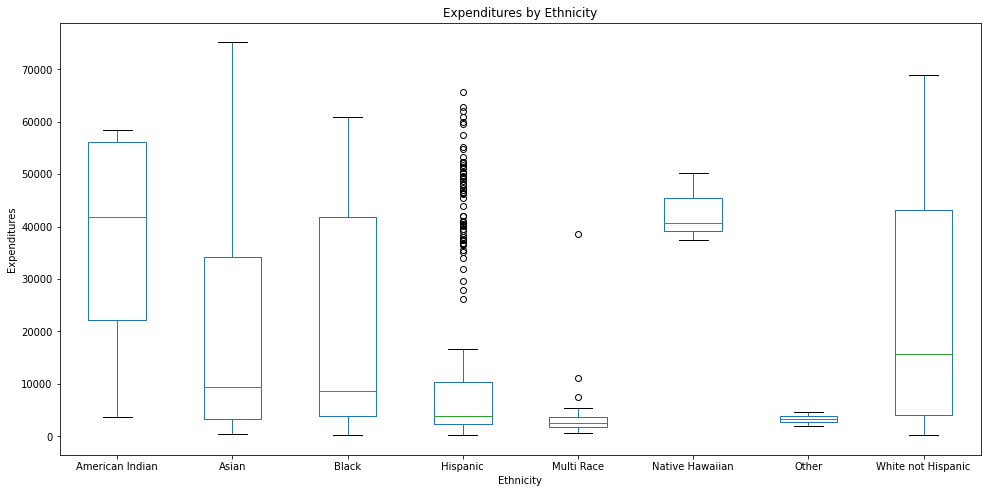

In [59]:
dds.boxplot(column=['Expenditures'], by=['Ethnicity'], figsize=(16,8), grid=False)
plt.suptitle('')
plt.title('Expenditures by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Expenditures')
plt.show()


여기서 바로 결론을 내리면 안됩니다.

이 박스 플랏을 보고 어떤 고민을 하면 될까요? 어떤 시도를 다시 해봐야할까요?

#### 참고 ) 그룹별로 색 지정하는 버전
색상 참고 : 
https://matplotlib.org/2.0.2/examples/color/named_colors.html

In [68]:
# 그룹별로 색 지정하는 버전 

# all = dds.boxplot(column=['Expenditures'], by=['Ethnicity'], color={'medians': 'red'}, 
#                             figsize=(16,8), grid=False, patch_artist=True,return_type='both')
# plt.suptitle('')
# plt.title('Expenditures By Ethnicity', fontsize=16 )
# plt.xlabel('Ethnicity')
# plt.ylabel('Expenditures')

# colors = ['darksalmon', 'tan', 'gold', 'olivedrab', 'lightseagreen','darkcyan','royalblue','plum']
 
# for row_key, (ax, row) in all.iteritems():
#     for i,box in enumerate(row['boxes']):
#         box.set_facecolor(colors[i])
 
# plt.show()

### - 성별

In [7]:
dds.groupby('Gender').mean().sort_values('Expenditures')

,Id,Age,Expenditures
Gender,,,
Male,54603.983903,22.859155,18001.195171
Female,54721.005964,22.741551,18129.606362


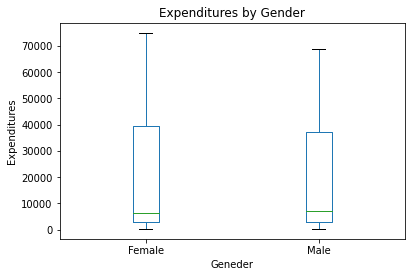

In [18]:
dds.boxplot(column=['Expenditures'], by=['Gender'], figsize=(6,4), grid=False)
plt.suptitle('')
plt.title('Expenditures by Gender')
plt.xlabel('Geneder')
plt.ylabel('Expenditures')
plt.show()

### - 연령대별

In [21]:
dds.loc[:,['Age Cohort', 'Expenditures']].groupby('Age Cohort').mean().sort_values('Expenditures')

,Expenditures
Age Cohort,
0 to 5,1415.280488
6 to 12,2226.862857
13 to 17,3922.613208
18 to 21,9888.537688
22 to 50,40209.283186
51+,53521.896226


## 3. 연령대별 + 인종별 분석

In [65]:
df = dds.loc[:,['Age Cohort', 'Expenditures', 'Ethnicity']]

zero_to_5 = df['Age Cohort'] == '0 to 5'
six_to_12 = df['Age Cohort'] == '6 to 12'
thirteen_to_17 = df['Age Cohort'] == '13 to 17'
eighteen_to_21 = df['Age Cohort'] == '18 to 21'
twentytwo_to_50 = df['Age Cohort'] == '22 to 50'
fiftyone_plus = df['Age Cohort'] == '51+'

colors = ['darksalmon', 'tan', 'gold', 'olivedrab', 'lightseagreen','darkcyan','royalblue','plum']

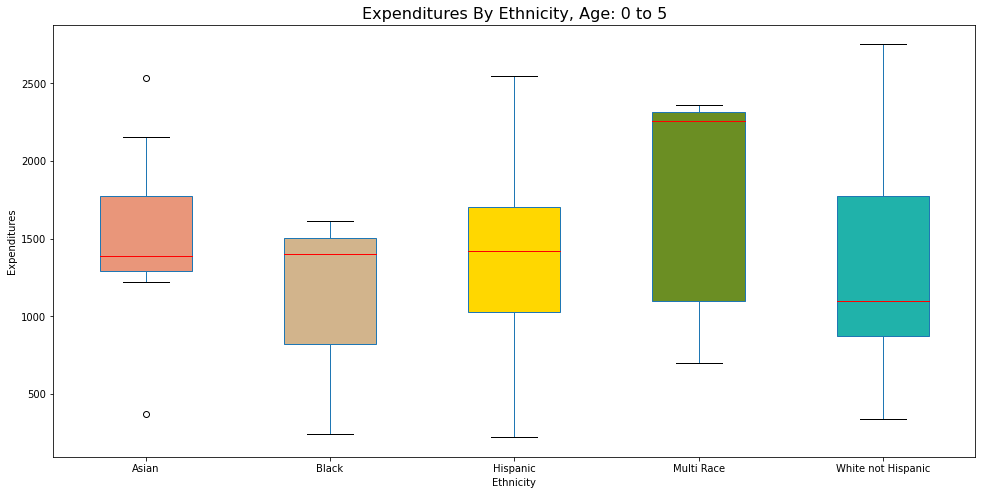

In [66]:
zero = df[zero_to_5].boxplot(column=['Expenditures'], by=['Ethnicity'], color={'medians': 'red'}, 
                            figsize=(16,8), grid=False, patch_artist=True,return_type='both')
plt.suptitle('')
plt.title('Expenditures By Ethnicity, Age: 0 to 5', fontsize=16 )
plt.xlabel('Ethnicity')
plt.ylabel('Expenditures')

for row_key, (ax, row) in zero.iteritems():
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i])
 
plt.show()

### Q 다른 연령대의 박스 플랏 모두 그리기

In [ ]:
# six_to_12

In [55]:
# six_to_12

In [56]:
# thirteen_to_17

In [57]:
# eighteen_to_21


In [ ]:
# twentytwo_to_50 

In [ ]:
# fiftyone_plus